<a href="https://colab.research.google.com/github/Patortiz26/IN6531-Miner-a-de-datos-2021-2/blob/main/Aux3_IN6531.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Auxiliar 3 - IN6531
**Autor: Patricio Ortiz**

<h3>Scikit-learn</h3>

Hay muchas bibliotecas para hacer análisis de datos. Para este tutorial vamos a usar **scikit-learn** (http://scikit-learn.org) que contiene muchos modelos de machine learning ya instalados. 

**OJO**: Si ya instalaste *Anaconda*, no necesitas instalar nada dado que viene en el pack. Idem para colab.

<h3>Contexto</h3>

En este tutorial usaremos `scikit-learn`, `numpy` y `scipy` para hacer entrenar nuestros modelos de clustering, junto con `matplotlib` *~~`plotly`~~* para hacer visualizaciones de estos.

##Clustering


En una tarea de **aprendizaje no supervisado**, no existe una etiqueta, solo existen inputs $D=\{x_{i}\}_{i=1}^{N}, x_{i}\in \mathbb{R}^{M}$.

Clustering es una tarea de aprendizaje no supervisado que busca agrupar los datos entorno a **clusters**, es decir, una colección de objetos con una alta similitud entre sí y una alta disimilitud con objectos de otros grupos.


Algunas características relevantes:
- **Similitud**: Métrica con la que se mide el grado de semejanza que poseen los objetos entre sí. 
- **Centroide**: Punto promedio de un cluster.
- **Calidad**:
    - Enfoque experto: Se define a priori que es un buen cluster dada las restricciones del negocio.
    - Métricas de siimilitud. Ej: WSS, BSS, Silhouette, purity, etc.
- **Aplicaciones**: Segmentación de mercado, perfilamiento de delitos, organización de contenido web.


Algunas métricas típicas de calidad:
- Within cluster Sum of Squares (WSS): mide que tan cohesionados son los clusters, mientras menor mayor cohesión o más compactos son los clusters, también es conocida como Inertia,

\begin{align}
WSS = \sum_{k=1}^{K}\sum_{x\in C_{k}}(x-\bar{x}_{k})^{2}
\end{align}

- Between cluster Sum of Squares (BSS): mide que tan separados está un cluster de otro cluster, mientras mayor más separados o disimiles son los clusters:

\begin{align}
BSS=\sum_{k=1}^{K}|C_{k}|(\bar{x}_{k}-\bar{x})^{2}
\end{align}

En este tutorial presentaremos 3 métodos de clustering para particionar datos: K-means, clustering jerárquico aglomerativo y DBSCAN (basado en densidad). 

link de interés: https://dashee87.github.io/data%20science/general/Clustering-with-Scikit-with-GIFs/

###K-Means

K-means es un método simple para particionar datos en distintos clusters, que intenta minimizar la distancia de cada punto de un cluster a su centroide. Para ejemplificar, y conocer cómo usarlo en scikit-learn, haremos un ejemplo práctico donde se ven claramente 3 clusters:

In [1]:
from sklearn.cluster import KMeans    #importar método para hacer KMeans
from sklearn import datasets          #importar datasets cargados en sklearn
import matplotlib.pyplot as plt       #para graficar
import numpy as np                    #numpy para manejo de arreglos

# Plotly library
import plotly.express as px           #librerias necesarias para usar plotly
import plotly.graph_objects as go
import plotly.figure_factory as ff

random_state = 20                     #Se fija aletoreidad necesaria

# Esto generara 500 datos con 2 features aleatorias cada uno, pero centrado alrededor de 3 centroides
X, y = datasets.make_blobs(n_samples=500, n_features=2, centers=3, random_state=random_state)

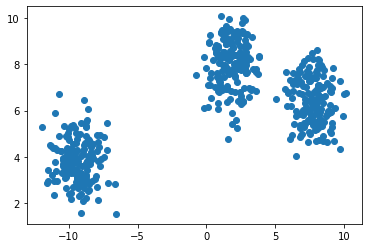

In [2]:
plt.scatter(X[:,0], X[:,1])

Ejecutamos k-means y le indicamos que queremos que divida los datos en 3 clusters:

In [3]:
kmeans = KMeans(n_clusters=3, n_init=20, max_iter=300, random_state=random_state) #Asi se usa el kmeans
kmeans.fit(X)                                                                     #fit retorna a self - ajusta los valores segun las instrucciones dadas
y_pred = kmeans.predict(X)                                                        #guardamos las predicciones

# tambien podemos hacer todo al mismo tiempo si no tenemos intenciones de usar el modelo mas veces
# y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X)

Lo que estamos haciendo es crear un objeto KMeans, que está configurado para asignar 3 clusters, y le damos un `random_state` para tener resultados replicables. `n_init` significa que vamos a correr el método `n_init` veces, donde cada vez que se inicie el método se generan centroides que parten de manera aleatoria, finalmente se queda con el resultado que tiene el error más bajo. `max_iter` nos dice el número máximo de iteraciones que hará el modelo en el caso de que no encuentre convergencia antes.

Luego pasamos los datos al modelo para que corra el algorimo de clustering. Finalmente le pedimos que nos de los clusters asignados a cada valor de entrada.

`scikit-learn` también tiene métodos que nos permiten hacer varias pasos simultaneos, como lo es `fit_predict`, que como dice el nombre corre el algoritmo pero al mismo tiempo nos devolverá los clusters asignados.

Con el objeto `kmeans` entrenado podemos preguntar por algunos de los resultados. Podemos revisar cuáles son los centroides finales del modelo con `cluster_centers_`, cuáles son las asignaciones por cada uno de los ejemplos con `labels_` (en este caso es lo mismo que `y_pred` que tenemos arriba), el error de los clusters con `inertia_` y cuántas iteraciones tomó encontrar este resultado con `n_iter_`.

In [4]:
# aqui tenemos los centroides del modelo elegido
kmeans.cluster_centers_

array([[-9.3753175 ,  3.85672799],
       [ 7.74173571,  6.38572168],
       [ 1.80025806,  7.99455026]])

In [5]:
# las asignaciones, o labels
kmeans.labels_

array([0, 2, 0, 0, 2, 2, 1, 1, 0, 0, 0, 2, 1, 1, 1, 0, 2, 0, 1, 1, 0, 0,
       2, 1, 2, 2, 0, 2, 0, 1, 1, 1, 2, 1, 0, 2, 0, 1, 2, 2, 1, 2, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 2, 2, 2, 0, 1, 2, 1, 1, 0, 1, 1, 2, 1, 0,
       0, 1, 0, 1, 1, 2, 1, 1, 2, 0, 0, 0, 1, 0, 2, 2, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 2, 0, 1, 0, 2, 1, 2, 0, 1, 1, 1, 2, 2, 0,
       0, 0, 0, 0, 0, 2, 2, 0, 2, 1, 2, 1, 1, 0, 0, 1, 2, 1, 2, 1, 0, 1,
       2, 0, 2, 2, 1, 0, 1, 2, 2, 1, 1, 2, 2, 2, 1, 0, 1, 2, 0, 0, 0, 0,
       0, 2, 1, 0, 2, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 2, 2, 1, 1,
       1, 1, 0, 2, 2, 2, 2, 1, 0, 1, 2, 1, 2, 1, 2, 2, 0, 2, 2, 2, 1, 1,
       2, 2, 0, 1, 1, 2, 0, 1, 1, 2, 1, 2, 0, 0, 2, 2, 0, 1, 2, 2, 0, 1,
       0, 1, 0, 1, 0, 1, 2, 0, 2, 0, 2, 0, 1, 0, 0, 0, 1, 2, 0, 2, 2, 1,
       1, 2, 1, 1, 1, 0, 2, 1, 1, 2, 0, 0, 1, 1, 1, 2, 2, 0, 1, 2, 1, 1,
       1, 0, 0, 1, 2, 0, 2, 2, 1, 2, 0, 2, 0, 0, 2, 2, 2, 1, 2, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 2, 2, 0, 1, 1, 0, 2, 1, 2,

In [6]:
# el error del resultado actual
kmeans.inertia_

961.1785281390884

También podemos obtenes medias de, por ejemplo, cuántos datos quedaron en cada cluster. No hay nada automático para obtener ese resultado, pero podemos usar numpy para contar los clusters.

In [7]:
counts = np.bincount(y_pred)
print(counts)

[166 167 167]


En este caso, esto significa que tenemos 166 datos en el cluster 0, 167 en el cluster 1 y 167 en el cluster 2.

In [8]:
# a veces tiene sentido filtrar los que tienen un valor mayor o igual a 0, ya que normalmente
# se asigna -1 cuando el dato es considerado ruido
# counts = np.bincount(y_pred[y_pred>=0])

#### Estimando la cantidad de clusters

En el ejemplo, creamos los datos nosotros, por lo que sabemos la cantidad de clusters que necesitamos. Sin embargo, esto no siempre es el caso, y como K-Means necesita este valor al momento de correr el algoritmo, no podemos dejarlo al azar.

Una forma de estimar el número de clusters es mediante la suma de la diferencia al cuadrado entre los puntos de cada cluster (SSE). En `scikit-learn` este dato se llama `inertia_`. Una tecnica para encontrar un número razonable de clusters a usar es el método del codo, donde calculamos el SSE para varios números de clusters y graficamos como varia el SSE, eligiendo el "mejor". Este concepto de "mejor" no es claro, pero la idea es elegir el último cluster antes de encontrarnos con el punto de _diminishing returns_, que sería cuando aumentar a más clusters nos da una mejora muy pequeña respecto a la que estamos considerando actualmente.

Veamos un ejemplo. Ejecutemos K-Means entre 1 y 15 clusters y grafiquemos cómo cambia el error a medida que aumentamos el número de clusters.


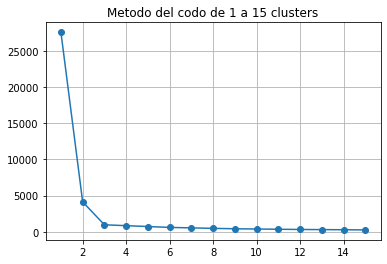

In [9]:
sse = []

clusters = list(range(1, 16))
for k in clusters:
    kmeans = KMeans(n_clusters=k).fit(X)
    sse.append(kmeans.inertia_)

plt.plot(clusters, sse, marker="o")
plt.title("Metodo del codo de 1 a 15 clusters")
plt.grid(True)
plt.show()

In [10]:
#Con PLOTLY
# sse = []

# clusters = list(range(1, 16))
# for k in clusters:
#     kmeans = KMeans(n_clusters=k).fit(X)
#     sse.append(kmeans.inertia_)

# fig = go.Figure(data=[
#     go.Scatter(x = clusters, y=sse, mode='lines'),
#     go.Scatter(x = clusters, y=sse, mode='markers')
# ])

# fig.update_layout(title="Metodo del codo de 1 a 15 clusters",
#                  xaxis_title = "Numero de Clusters",
#                  yaxis_title = "SSE",
#                  showlegend=False)
# fig.show()

El gráfico nos muestra el error de K-Means usando diferentes números de clusters. 
Acá se puede notar que un valor óptimo es 3 (mirar donde se forma el `codo` o el punto tras el cual el error decrece de manera menos significativa). 
Si eligiéramos 4 o más, veríamos más particiones, pero posiblemente estaríamos separando clusters ya existentes en clusters más pequeños.
Ojo que este método es una heurística y no siempre el `codo` es claramente visible.

¿De qué forma podría mejorar este método para tener una estimación más confiable?

#### Visualización de clusters

Para ver los resultados del clustering de forma visual, podemos graficarlos y luego pintarlos de colores distintos dependiendo de a qué cluster corresponde cada punto.
En el siguiente código lo que hacemos es graficar los puntos igual que antes, pero agregamos el argumento `c`, que nos permite indicar de qué color pintar cada punto. Como tenemos `y_pred` o el atributo `labels_`, que corresponde al label o asignación para cada uno de los puntos, mediante esta podemos decirle a `matplotlib` que pinte cada punto con el color del cluster que se le fue asignado.

In [11]:
kmeans = KMeans(n_clusters=3, random_state=random_state).fit(X)

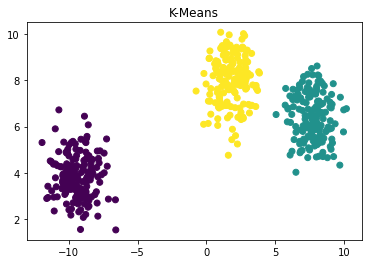

In [12]:
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_)
plt.title("K-Means")
plt.show()

In [ ]:
# fig = px.scatter(x=X[:, 0], y=X[:, 1], color=kmeans.labels_, color_continuous_scale='viridis')
# fig.update_layout(title="K-Means",
#                  showlegend=True)
# fig.show()

También podemos agregar los centroides a nuestro gráfico para ver dónde quedaron.

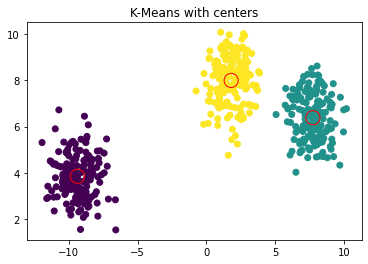

In [13]:
centers = kmeans.cluster_centers_

plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_)
plt.scatter(centers[:,0], centers[:,1], s=200, facecolors='none', edgecolors='r')
plt.title("K-Means with centers")
plt.show()

In [14]:
# centers = kmeans.cluster_centers_

# fig = go.Figure(data=[
#     go.Scatter(x = X[:, 0], y=X[:, 1], customdata=kmeans.labels_, mode="markers", 
#                marker=dict(color=kmeans.labels_, colorscale='viridis'), name='Datos'),
#     go.Scatter(x = centers[:,0], y=centers[:,1], mode="markers", name='Centroides', 
#                marker_symbol='circle-open', marker_size=15)
# ])

# fig.update_layout(title="K-Means with centers",
#                  showlegend=True)
# fig.show()

Esto lo podemos hacer directo solo porque estamos usando 2 features, por lo que tenemos 2 dimensiones. Esto nos permite graficar en 2 dimensiones sin problemas, pero en el caso de que tuvieramos más, 100 por ejemplo, ya no podríamos tener esta ayuda visual como lo estamos haciendo ahora.
Para esos casos lo que podemos hacer es hacer reducción de dimensionalidad a 2 dimensiones y graficar esta proyección de alta dimensionalidad a baja dimensionalidad. ¿Como podemos hacer esto?

### Clustering Jerárquico Aglomerativo (Hierarchical clustering)

Otra forma de hacer clustering es mediante Clustering Jerárquico Aglomerativo. En este método lo que hacemos es partir con que cada dato es un cluster independiente de los demás, y luego, mediante una matriz de distancias vamos uniendo datos, creando anidaciones de clusters. Continuamos hasta que quede solo 1 cluster muy grande.

Generalmente estos métodos se grafican como un dendrograma, y usan la distancia euclidiana para calcular las matrices de distancias. Dicho esto, se pueden usar otras métricas de distancia para calcular la matriz de afinidad pero en la mayoría de los casos usamos la distancia euclidiana.

Vamos a presentar 4 criterios para ir uniendo los clusters. Estos corresponden a `complete`, `average`, `single` y `ward`. Aquí una descripción rápida de los criterios:
* `complete`: considera la distancia máxima entre 2 clusters
* `average`: considera la distancia promedio entre 2 clusters
* `single`: considera la distancia mínima entre 2 clusters
* `ward`: minimiza la varianza entre los 2 clusters

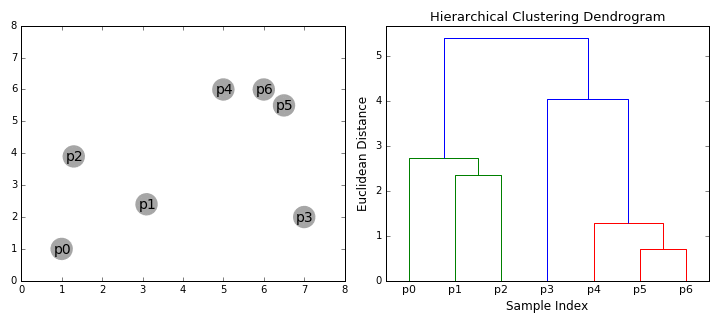

Para trabajar con clustering jerárquico podemos usar `scikit-learn` o `scipy`. `scikit-learn` lamentablemente no tiene una forma directa de graficar los dendrogramas, pero `scipy` sí, así que presentaremos ambas por si alguna vez las necesitan.

En `scipy` existe todo un módulo dedicado a clustering jerárquico [scipy.cluster.hierarchy](https://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html). En particular aquí usaremos `linkage` para generar las uniones de cada dato y cluster, y `dendrogram` para graficar el árbol.

En `scikit-learn` tenemos [sklearn.cluster.AgglomerativeClustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering) para computar los clusters y asignar los labels a cada dato.

In [15]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

Aquí computamos los árboles usando cada uno de los criterios:

In [16]:
complete = linkage(X, method="complete")
single = linkage(X, method="single")
average = linkage(X, method="average")
ward = linkage(X, method="ward")

Y ahora podemos graficar los árboles para ver como se distribuyen las ramas del árbol.

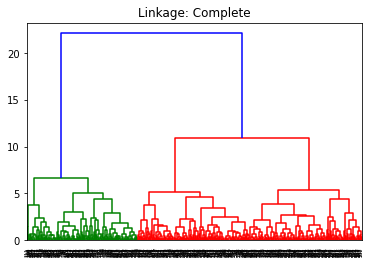

In [17]:
dendrogram(complete)
plt.title("Linkage: Complete")
plt.show()

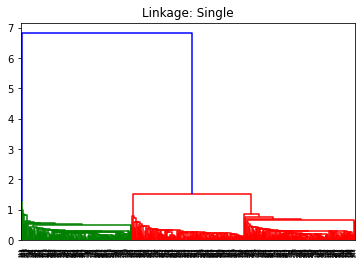

In [18]:
dendrogram(single)
plt.title("Linkage: Single")
plt.show()

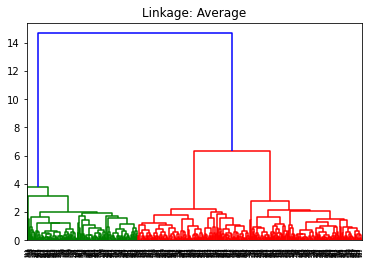

In [19]:
dendrogram(average)
plt.title("Linkage: Average")
plt.show()

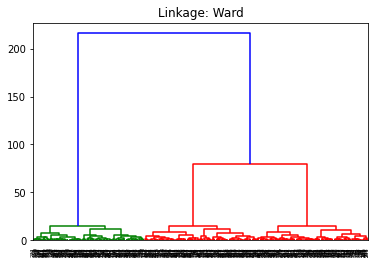

In [20]:
dendrogram(ward)
plt.title("Linkage: Ward")
plt.show()

In [21]:
#para usar plotly se debe ir cambiando complete por el criterio adecuado

# fig_den_Complete = ff.create_dendrogram(X, 
#                                         linkagefun=lambda x: linkage(x, 'complete', metric='euclidean')
#                                         )
# # Si deseamos podemos variar el tamaño de la salida
# fig_den_Complete.update_layout(title="Linkage: Complete",
#                       width=800, height=500)
# fig_den_Complete.show()

Viendo los arboles nos damos cuenta que las divisiones son bastante distintas entre cada método, pero en todas, visualmente, podemos llegar a un acuerdo de que 3 clusters es un número razonable.

Visualmente podemos cortar el arbol en distintos puntos para ver cómo se distribuyen los datos en las ramas. Luego manualente decidir viendo el dendrograma cuál sería una buena distancia para cortar el árbol.

Por ejemplo, en el caso de `ward`, 50 parece ser un buen número para cortar.

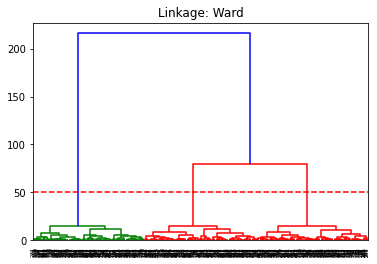

In [23]:
dendrogram(ward)
plt.title("Linkage: Ward")
plt.axhline(y=50, color='r', linestyle='--')
plt.show()

In [24]:
#con codigo para hacer linea en plotly

# fig_den_ward = ff.create_dendrogram(X,
#                                     linkagefun=lambda x: linkage(x, 'ward', metric='euclidean')
#                                     )

# fig_den_Ward.update_layout(title="Linkage: Ward",
#                       width=800, height=500)
# fig_den_Ward.update_layout(shapes=[
#     dict(type= 'rect',y0= 50, y1= 50, x0=0, x1=5000,line=dict(
#         color="red",
#         width=3,
#         dash="dashdot")
#         )])
# fig_den_Ward.show()

Hasta ahora hemos solo graficado los árboles, pero no hemos etiquetado los datos. Ahora podemos usar `scikit-learn` con `AgglomerativeClustering`. Aquí tenemos varias opciones.
* Si sabemos cuantos clusters queremos (viendo el dendrograma), agregamos el parametro `n_clusters` y lo dejamos en cuántos clusters queremos.
* Si sabemos a la distancia que queremos cortar (tambien viendo el dendrograma), entonces usamos el parametro `distance_threshold`.
* En el caso de que no usemos `linkage` podemos hacer correr el algoritmo y que genere todo el arbol (dejando `n_clusters=None` y `distance_threshold=0`), luego calcular la matriz de relaciones a mano, graficarla usando el dendrograma, decidir dónde cortar y volver a unos de los 2 puntos anteriores.

Corramos primero generando todo el árbol.

In [25]:
ward_all = AgglomerativeClustering(n_clusters=None, linkage="ward", distance_threshold=0).fit(X)
print(ward_all.n_clusters_)

500


Como generamos el árbol entero tenemos tantos clusters como datos! Ahora, viendo el dendrograma anterior de ward decidimos que queremos 3 clusters. Entonces usamos lo siguiente:

In [26]:
ward_3 = AgglomerativeClustering(n_clusters=3, linkage="ward").fit(X)
print(ward_3.n_clusters_)

3


Y también podemos obtener la etiquetas.

In [27]:
ward_3.labels_

array([1, 2, 1, 1, 2, 2, 0, 0, 1, 1, 1, 2, 0, 0, 0, 1, 2, 1, 0, 0, 1, 1,
       2, 0, 2, 2, 1, 2, 1, 0, 0, 0, 2, 0, 1, 2, 1, 0, 2, 2, 0, 2, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 2, 2, 2, 1, 0, 2, 0, 0, 1, 0, 0, 2, 0, 1,
       1, 0, 1, 0, 0, 2, 0, 0, 2, 1, 1, 1, 0, 1, 2, 2, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 2, 1, 0, 1, 2, 0, 2, 1, 0, 0, 0, 2, 2, 1,
       1, 1, 1, 1, 1, 2, 2, 1, 2, 0, 2, 0, 0, 1, 1, 0, 2, 0, 2, 0, 1, 0,
       2, 1, 2, 2, 0, 1, 0, 2, 2, 0, 0, 2, 2, 2, 0, 1, 0, 2, 1, 1, 1, 1,
       1, 2, 0, 1, 2, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 2, 2, 0, 0,
       0, 0, 1, 2, 2, 2, 2, 0, 1, 0, 2, 0, 2, 0, 2, 2, 1, 2, 2, 2, 0, 0,
       2, 2, 1, 0, 0, 2, 1, 0, 0, 2, 0, 2, 1, 1, 2, 2, 1, 0, 2, 2, 1, 0,
       1, 0, 1, 0, 1, 0, 2, 1, 2, 1, 2, 1, 0, 1, 1, 1, 0, 2, 1, 2, 2, 0,
       0, 2, 0, 0, 0, 1, 2, 0, 0, 2, 1, 1, 0, 0, 0, 2, 2, 1, 0, 2, 0, 0,
       0, 1, 1, 0, 2, 1, 2, 2, 0, 2, 1, 2, 1, 1, 2, 2, 2, 0, 2, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 2, 2, 1, 0, 0, 1, 2, 0, 2,

Por supuesto, también podríamos haber decidido una distancia de donde cortar en vez de un número de clusters. En ese caso hacemos lo siguiente:

In [28]:
ward_dist = AgglomerativeClustering(n_clusters=None, linkage="ward", distance_threshold=50).fit(X)
print(ward_dist.n_clusters_)
print(ward_dist.labels_)

3
[1 2 1 1 2 2 0 0 1 1 1 2 0 0 0 1 2 1 0 0 1 1 2 0 2 2 1 2 1 0 0 0 2 0 1 2 1
 0 2 2 0 2 0 0 0 0 1 1 1 0 0 0 2 2 2 1 0 2 0 0 1 0 0 2 0 1 1 0 1 0 0 2 0 0
 2 1 1 1 0 1 2 2 1 1 1 0 0 0 1 0 1 0 0 1 1 0 2 1 0 1 2 0 2 1 0 0 0 2 2 1 1
 1 1 1 1 2 2 1 2 0 2 0 0 1 1 0 2 0 2 0 1 0 2 1 2 2 0 1 0 2 2 0 0 2 2 2 0 1
 0 2 1 1 1 1 1 2 0 1 2 1 0 1 1 0 1 1 1 1 1 1 0 1 2 2 0 0 0 0 1 2 2 2 2 0 1
 0 2 0 2 0 2 2 1 2 2 2 0 0 2 2 1 0 0 2 1 0 0 2 0 2 1 1 2 2 1 0 2 2 1 0 1 0
 1 0 1 0 2 1 2 1 2 1 0 1 1 1 0 2 1 2 2 0 0 2 0 0 0 1 2 0 0 2 1 1 0 0 0 2 2
 1 0 2 0 0 0 1 1 0 2 1 2 2 0 2 1 2 1 1 2 2 2 0 2 1 0 0 0 1 0 1 0 1 2 2 1 0
 0 1 2 0 2 1 2 1 1 1 2 2 1 1 1 2 2 2 0 2 2 0 0 2 0 2 2 0 1 2 0 0 2 0 2 0 2
 2 1 1 1 0 2 2 1 1 0 1 1 2 0 2 1 2 1 0 2 2 1 2 1 2 2 1 2 0 2 2 1 1 1 0 1 0
 2 2 2 1 1 0 0 1 0 0 2 2 0 2 2 2 2 2 0 2 0 0 1 2 0 1 2 1 1 0 1 2 2 0 2 0 1
 2 0 0 1 1 1 2 0 1 1 2 2 0 2 0 2 0 0 0 0 1 1 1 2 2 1 1 2 2 1 0 2 0 2 2 2 2
 0 1 2 0 2 2 2 1 1 0 1 0 1 2 2 1 1 1 1 1 0 0 2 0 1 0 1 2 2 1 2 1 1 0 0 2 0
 0 1 0 1 0 0 1 1 1 1 2 

Podemos ver que en este caso los clusters asignados a cada dato son los mismos que cuando forzamos 3 clusters.

In [29]:
np.all(ward_3.labels_ == ward_dist.labels_)

True

Finalmente igual que en el caso de K-Means, podemos graficar nuestros clusters pintando cada dato del color asignado a cada cluster.

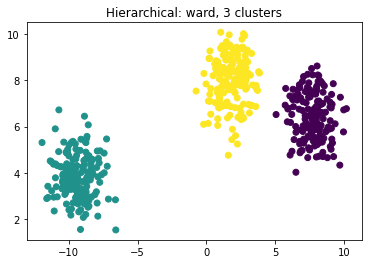

In [30]:
plt.scatter(X[:, 0], X[:, 1], c=ward_3.labels_)
plt.title("Hierarchical: ward, 3 clusters")
plt.show()

###DBSCAN

Algoritmo de clustering basado en densidad. Este método permite identificar clusters cuyos datos contienen mucho ruido, outliers y presentan una forma poco clara de separar en un plano. Pero tiene la debilidad de no funcionar bien cuando los clusters tienen densidades variables o tenemos una dimensionalidad muy alta.

Probemos primero con el daset anterior que ya sabemos hay 3 clusters.

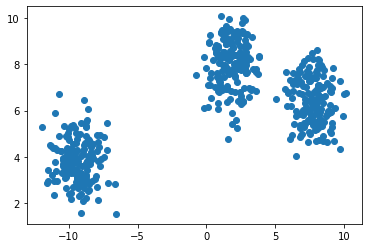

In [31]:
plt.scatter(X[:,0], X[:,1])
# fig = px.scatter(x=X[:, 0], y=X[:, 1])
# fig.show()

DBSCAN está implementado en scikit-learn y necesita de los parametros eps y min_samples. eps corresponde a la distancia dentro de la cual se consideran 2 puntos vecinos, min_samples corresponde al minpts visto en clases, que es el número de vecinos que tiene que tener un punto para ser considerado un punto core.

In [32]:
from sklearn.cluster import DBSCAN

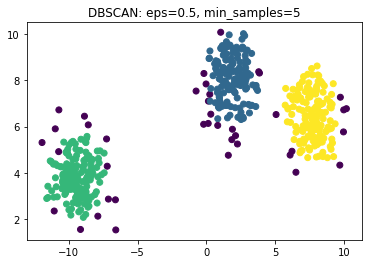

In [34]:
eps = 0.5
min_samples = 5

dbscan = DBSCAN(eps=eps, min_samples=min_samples).fit(X)
plt.scatter(X[:,0], X[:,1], c=dbscan.labels_)
plt.title(f"DBSCAN: eps={eps}, min_samples={min_samples}")
plt.show()

# dbscan = DBSCAN(eps=eps, min_samples=min_samples).fit(X)
# fig = px.scatter(x=X[:, 0], y=X[:, 1], color=dbscan.labels_, color_continuous_scale='viridis')
# fig.update_layout(title=f"DBSCAN: eps={eps}, min_samples={min_samples}",
#                  showlegend=True)
# fig.show()

`eps` es el parametro más importante de DBSCAN, por lo que tenemos que elegirlo con cuidado. En este caso podemos ver que dice que hay 4 "clusters", de los cuales 3 son clusters reales y el resto es considerado como ruido.

Ahora probemos con un dataset un poco distinto, unos círculos concéntricos.

In [35]:
X2, y2 = datasets.make_circles(n_samples=1500, factor=.5,noise=.05)

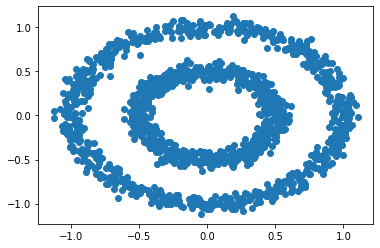

In [36]:
plt.scatter(X2[:,0], X2[:,1])

# fig = px.scatter(x=X2[:,0], y=X2[:,1])
# fig.show()

Nosotros humanos vemos claramente que hay 2 grupos de datos. Sin embargo, K-Means no es capaz de separar esos 2 clusters, y los métodos aglomerativos necesitan de ayudas como mátrices de conectividad para lograrlo. Veamos como DBSCAN sí puede.

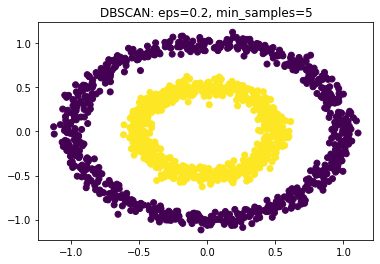

In [37]:
eps = 0.2
min_samples = 5

dbscan_circles = DBSCAN(eps=eps, min_samples=min_samples).fit(X2)
plt.scatter(X2[:,0], X2[:,1], c=dbscan_circles.labels_)
plt.title(f"DBSCAN: eps={eps}, min_samples={min_samples}")
plt.show()

# dbscan_circles = DBSCAN(eps=eps, min_samples=min_samples).fit(X2)
# fig = px.scatter(x=X2[:,0], y=X2[:,1], color=dbscan_circles.labels_)
# fig.update_layout(title=f"DBSCAN: eps={eps}, min_samples={min_samples}",
#                  showlegend=True)
# fig.show()

Aquí podemos ver otros ejemplos con otros datasets con que las otras técnicas de clustering tienen problemas.

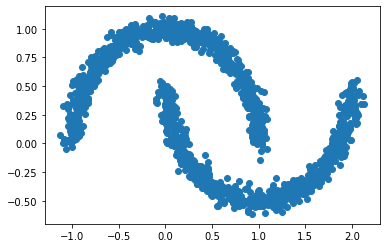

In [38]:
X3, y3 = datasets.make_moons(n_samples=1500, noise=.05)
plt.scatter(X3[:,0], X3[:,1])

# fig = px.scatter(x=X3[:,0], y=X3[:,1])
# fig.show()

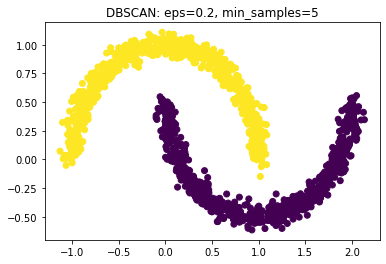

In [39]:
eps = 0.2
min_samples = 5

dbscan_moon = DBSCAN(eps=eps, min_samples=min_samples).fit(X3)
plt.scatter(X3[:,0], X3[:,1], c=dbscan_moon.labels_)
plt.title(f"DBSCAN: eps={eps}, min_samples={min_samples}")
plt.show()

# dbscan_moon = DBSCAN(eps=eps, min_samples=min_samples).fit(X3)
# fig = px.scatter(x=X3[:,0], y=X3[:,1], color=dbscan_moon.labels_)
# fig.update_layout(title=f"DBSCAN: eps={eps}, min_samples={min_samples}",
#                  showlegend=True)
# fig.show()

###Evaluación de clusters


Evaluar la calidad de nuestros clusters es algo no trivial. En 2 dimensiones podemos claramente encontrar separaciones de clusters visualmente, asumiendo que es tan simple como mirar un gráfico. El tema es que rara vez tendremos solo 2 dimensiones en nuestros datos, y cuando ya tenemos más de 3 dimensiones, no podemos graficarlo de una forma directa y tenemos que depender de técnicas de reducción de dimensionalidad. Se verá más adelante en el curso, pero las salidas de estas técnicas no son realmente interpretables.

En esta sección veremos algunas forma de evaluar clusters, sea visual o numéricamente.

####Visual - Matriz de similitud (proximidad)

Uno de los métodos para evaluar la calidad de los clusters es haciendo una matriz de similitud. Estas matrices nos permiten ver qué tan cerca están los puntos pertenecientes a un cluster entre sí, y simultaneamente ver qué tan lejos están los puntos de un cluster de los otros clusters.

In [40]:
from sklearn.metrics.pairwise import euclidean_distances

In [41]:
def sim_matrix(features, labels):
    useful_labels = labels >= 0

    # primero ordenamos los datos en base al cluster que pertencen
    indices = np.argsort(labels[useful_labels])
    sorted_features = features[useful_labels][indices]

    # calculamos las distancias entre todos los puntos
    d = euclidean_distances(sorted_features, sorted_features)
    return d

def plot(data, model):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,5))

    fig.suptitle(f"{model.__class__.__name__}")

    ax1.scatter(data[:,0], data[:,1], c=model.labels_)

    dist = sim_matrix(data, model.labels_)
    im = ax2.imshow(dist, cmap="jet")
    fig.colorbar(im, ax=ax2)

def int_plot(data, model):
    fig = make_subplots(rows=1, cols=2)

    fig.add_trace(go.Scatter(x=data[:,0] ,y=data[:,1], customdata=model.labels_, mode="markers", 
               marker=dict(color=model.labels_, colorscale='viridis'), name='Datos'), row=1, col=1)

    dist = sim_matrix(data, model.labels_)
    fig.add_trace(go.Heatmap(z=np.rot90(dist, 1), colorscale='turbo'),row=1, col=2)  

    fig.update_layout(title=f"{model.__class__.__name__}",
                 showlegend=True)
    fig.show()

---

Usando los primeros datos que teniamos, obtenemos los siguientes resultados.

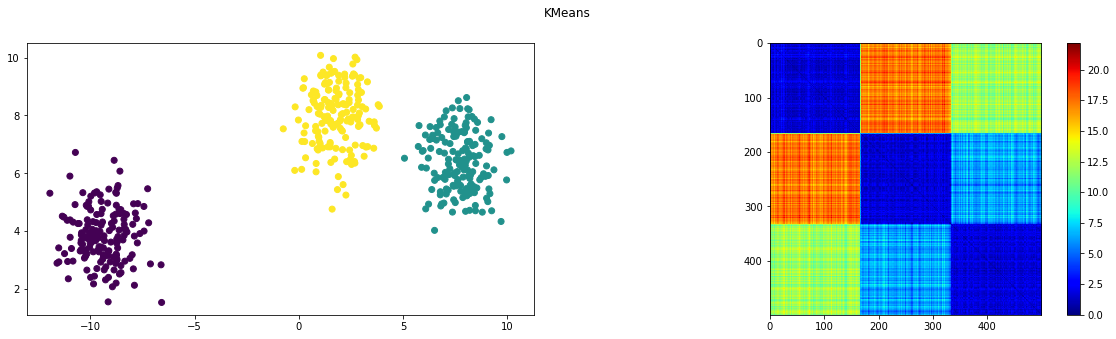

In [43]:
kmeans1 = KMeans(n_clusters=3, random_state=random_state).fit(X)

plot(X, kmeans1)
plt.show()

# int_plot(X, kmeans1)

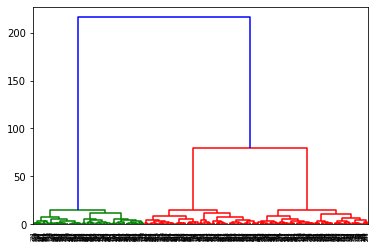

In [44]:
ward_link1 = linkage(X, method="ward")
dendrogram(ward_link1)
plt.show()

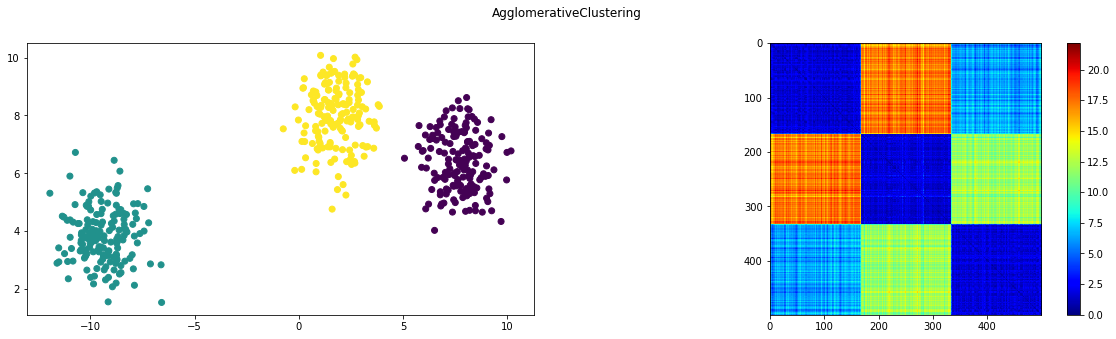

In [45]:
ward_clust1 = AgglomerativeClustering(n_clusters=3, linkage="ward").fit(X)

plot(X, ward_clust1)
plt.show()

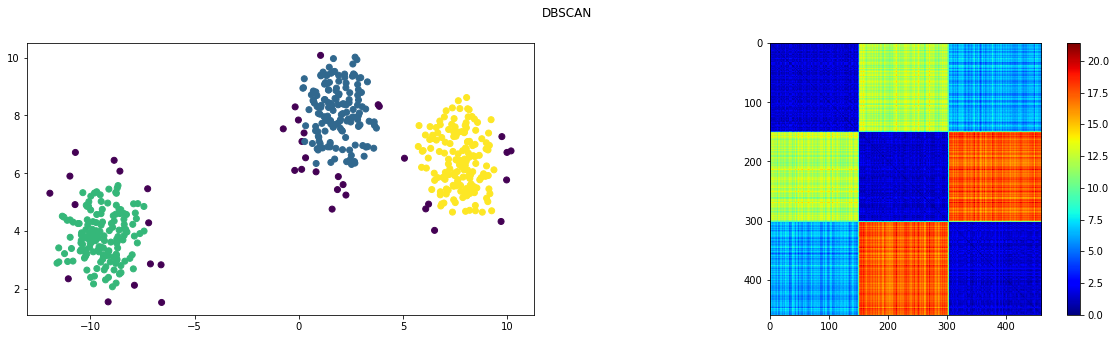

In [46]:
dbscan1 = DBSCAN(eps=0.5, min_samples=5).fit(X)

plot(X, dbscan1)
plt.show()

Vemos que a todos les va más o menos igual de bien. ¿y con los circulos?

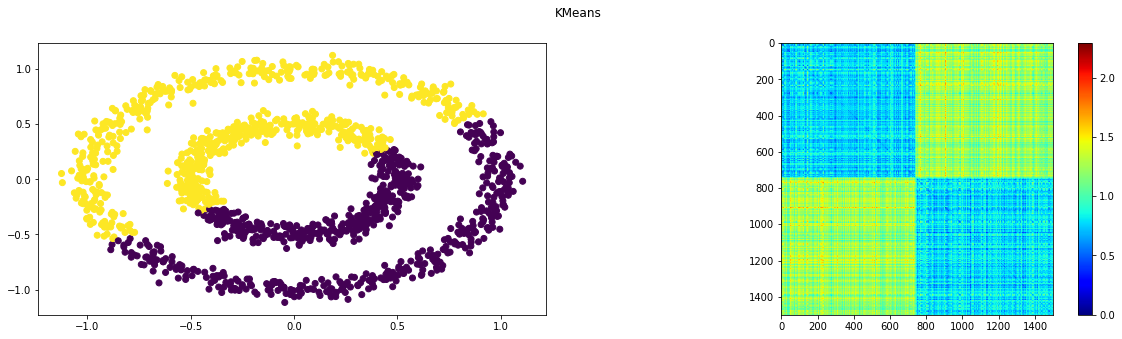

In [47]:
kmeans2 = KMeans(n_clusters=2, random_state=random_state).fit(X2)

plot(X2, kmeans2)
plt.show()

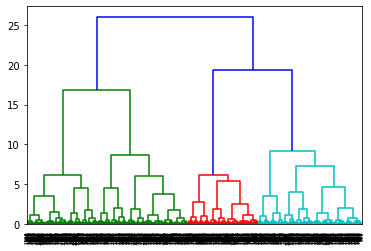

In [48]:
ward_link2 = linkage(X2, method="ward")
dendrogram(ward_link2)
plt.show()

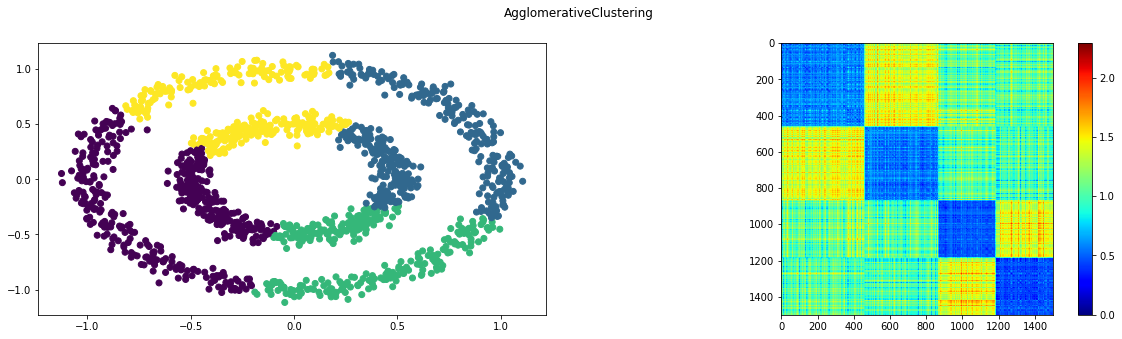

In [49]:
ward_clust2 = AgglomerativeClustering(n_clusters=4, linkage="ward").fit(X2)

plot(X2, ward_clust2)
plt.show()

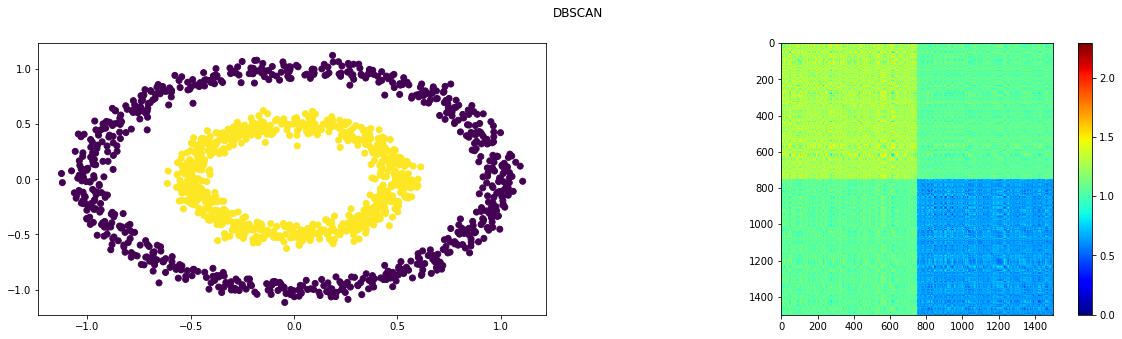

In [50]:
dbscan2 = DBSCAN(eps=0.2, min_samples=5).fit(X2)

plot(X2, dbscan2)
plt.show()

En este caso vemos como K-Means y clustering aglomerativo fallan y DBSCAN captura exitosamente la division de clusters. Dicho esto, la matriz de similitud no logra capturar bien esta división, haciendo que se vea un cluster bueno y otro de menor calidad en DBSCAN.

####Númerica -Silhouette



Presentaremos otra forma de evaluar clusters, esta vez de una manera no visual usando el coeficiente de Silhouette. Este coeficiente calcula para cada punto:

1) su distancia promedio al resto de los puntos en su mismo clases, digamos `a`. En ingles esto se llama `mean intra-cluster distance`.

2) su distancia promedio a todos los puntos del cluster mas cercano, digamos `b`. En ingles esto se llama `mean nearest-cluster distance`.
Entonces el coeficiente de Silhouette se calcula con la siguiente formula:
$$\frac{b - a}{max(a, b)}$$

Esta métrica esta en un rango entre -1 y 1, donde 1 significa que algo está bien asignado, -1 significa que algo está mal asignado porque hay otro cluster más similar, y 0 significa que hay solapamiento de clusters.


In [51]:
from sklearn.metrics import silhouette_score

El coeficiente de Silhouette se calcula pasando el dataset y los labels asignados por el metodo de cluster:
```python
silhouette_score(<dataset>, <labels>)
```

Calculemos el Silhouette score de los modelos entrenados en la parte anterior.

In [52]:
print("Dataset X K-Means\t", silhouette_score(X, kmeans1.labels_))
print("Dataset X Ward Agg\t", silhouette_score(X, ward_clust1.labels_))
# para DBSCAN tenermos que filtrar las labels negativas, ya que representan ruido, no otro cluster
_filter_label = dbscan1.labels_ >= 0
print("Dataset X DBSCAN\t", silhouette_score(X[_filter_label], dbscan1.labels_[_filter_label]))

Dataset X K-Means	 0.7609159725439754
Dataset X Ward Agg	 0.7609159725439754
Dataset X DBSCAN	 0.7798244078959


In [53]:
print("Dataset X2 K-Means\t", silhouette_score(X2, kmeans2.labels_))
print("Dataset X2 Ward Agg\t", silhouette_score(X2, ward_clust2.labels_))
# para DBSCAN tenermos que filtrar las labels negativas, ya que representan ruido, no otro cluster
_filter_label = dbscan2.labels_ >= 0
print("Dataset X2 DBSCAN\t", silhouette_score(X2[_filter_label], dbscan2.labels_[_filter_label]))

Dataset X2 K-Means	 0.35316703497225194
Dataset X2 Ward Agg	 0.35424434536876653
Dataset X2 DBSCAN	 0.11274053677772193


###Experimento

#### Dataframe

En este experimento se utilizará la base de datos iris, una base de datos que contiene tres tipos de flores (50 de cada clase): setosa (1), versicolor (2) y virginica (3). Cada observación cuenta de cuatro características medidas por un botánico, estas son: largo del sépalo, ancho del sépalo, largo del pétalo y ancho del pétalo. 

In [54]:
import numpy as np
import pandas as pd

# https://plotly.com/python/
import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

# importar dataset iris desde sklearn
from sklearn.datasets import load_iris

# modelos
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage

In [55]:
# dataset a dataframe
iris = load_iris()
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

# llevar ids a un nombre
iris_species = {0:"setosa", 1:"versicolor", 2:"virginica"}
df.loc[:,"target"] = df.apply(lambda x: iris_species[x["target"]], axis=1)

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [56]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [57]:
df.groupby("target").agg({"target":"count"})

,target
target,
setosa,50
versicolor,50
virginica,50


In [58]:
# características
x = df.iloc[:, 0:4].values
# etiqueta
y = df.iloc[:, 4].values

#### PCA 

PCA es una transformación lineal de un espacio $M$ dimencional a un espacio $D$ dimensional, con $D\leq M$. Es una transformación útil para visualizar datos multidimensionales y tener una **idea** (idea que puede llevar a conclusiones errones si se pierde mucha información al reducir abruptamente la dimencionalidad) de cómo distribuyen los datos.

In [60]:
# crear objeto PCA con el número de componentes principales a inferir
pca = PCA(n_components=2)
# ajustar pca a los datos
principalComponents = pca.fit_transform(x)

# dataframe con los componentes principales descubiertos para cada observación
df_pca = pd.DataFrame(data = principalComponents, columns = ['c1', 'c2'])
df_pca['target']=y

df_pca.head()

,c1,c2,target
0,-2.684126,0.319397,setosa
1,-2.714142,-0.177001,setosa
2,-2.888991,-0.144949,setosa
3,-2.745343,-0.318299,setosa
4,-2.728717,0.326755,setosa


In [77]:
fig = px.scatter(df_pca, x="c1", y="c2", color="target")
fig.update_layout(template="plotly_white")
fig.show()

####K-means

In [62]:
# se crea objeto kmenas
kmeans = KMeans(n_clusters= 3, init='k-means++', random_state=0)
# se ajusta el modelo a los datos
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [63]:
kmeans.cluster_centers_

array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

In [64]:
df_kmeans = df_pca.copy()
df_kmeans["target"] = kmeans.labels_
clusters = {0:"c1", 1:"c2", 2:"c3"}
df_kmeans.loc[:,"cluster"] = df_kmeans.apply(lambda x: clusters[x["target"]], axis=1)
df_kmeans.head()

,c1,c2,target,cluster
0,-2.684126,0.319397,1,c2
1,-2.714142,-0.177001,1,c2
2,-2.888991,-0.144949,1,c2
3,-2.745343,-0.318299,1,c2
4,-2.728717,0.326755,1,c2


In [65]:
# visualizar asignación de kmeans
fig = px.scatter(df_kmeans, x="c1", y="c2", color="cluster")
fig.update_layout(template="plotly_white")
fig.show()

In [66]:
# probemos con distintos números de clusters
K = range(2,11)
inertias = []
for k in K:
    # se crea objeto kmeans
    kmeans = KMeans(n_clusters= k, init='k-means++', random_state=0)
    # se ajusta el modelo a los datos
    kmeans.fit(x)
    # desempeño
    inertias.append(kmeans.inertia_)

In [67]:
fig = go.Figure(data=go.Scatter(x=list(K), y=inertias, mode="markers+lines"))
fig.update_layout(template="plotly_white", 
                   xaxis_title="K",
                   yaxis_title="Inertia",
                   title="Diagrama del codo")
fig.show()

El gráfico del codo nos dice que un número adecuado de clusters podría ser 3, por lo que volvemos ajustar k-means para ese número.

In [68]:
# se crea objeto kmenas
kmeans = KMeans(n_clusters= 3, init='k-means++', random_state=0)
# se ajusta el modelo a los datos
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [69]:
# dataframe con las asignaciones de kmeans
df_kmeans = df.copy()
df_kmeans["cluster"] = kmeans.labels_
clusters = {0:"c1", 1:"c2", 2:"c3"}
df_kmeans.loc[:,"cluster"] = df_kmeans.apply(lambda x: clusters[x["cluster"]], axis=1)
df_kmeans.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,cluster
0,5.1,3.5,1.4,0.2,setosa,c2
1,4.9,3.0,1.4,0.2,setosa,c2
2,4.7,3.2,1.3,0.2,setosa,c2
3,4.6,3.1,1.5,0.2,setosa,c2
4,5.0,3.6,1.4,0.2,setosa,c2


In [70]:
# centroide de cada cluster
mean_by_cluster = df_kmeans.groupby("cluster").mean()
# lista con nombre de las columnas
columns = mean_by_cluster.columns

# centroide de cada especie
mean_by_species = df.groupby("target").mean()

mean_by_cluster

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
cluster,,,,
c1,6.850000,3.073684,5.742105,2.071053
c2,5.006000,3.428000,1.462000,0.246000
c3,5.901613,2.748387,4.393548,1.433871


In [78]:
mean_by_species

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
target,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


####Jerarquico Aglomerativo

In [72]:
ac_complete = AgglomerativeClustering(linkage="complete", 
                                    distance_threshold=None, 
                                    n_clusters=3)
ac_complete.fit(x)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='complete', memory=None, n_clusters=3)

In [73]:
# dataframe con las asignaciones de jerar aglomerativo con complete
df_agg = df.copy()
df_agg["cluster"] = ac_complete.labels_
clusters = {0:"c1", 1:"c2", 2:"c3"}
df_agg.loc[:,"cluster"] = df_agg.apply(lambda x: clusters[x["cluster"]], axis=1)
df_agg.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,cluster
0,5.1,3.5,1.4,0.2,setosa,c2
1,4.9,3.0,1.4,0.2,setosa,c2
2,4.7,3.2,1.3,0.2,setosa,c2
3,4.6,3.1,1.5,0.2,setosa,c2
4,5.0,3.6,1.4,0.2,setosa,c2


In [ ]:
# dendograma

fig = ff.create_dendrogram(
    x,  labels=y,
    linkagefun=lambda x: linkage(x, 'complete', metric='euclidean'),
    color_threshold=4
)

fig.update_layout(template="plotly_white", 
                   xaxis_title="Distancia",
                   yaxis_title="Especie",
                   title="Dendograma",
                   width=800, height=1600)

fig.show()

In [74]:
# centroide de cada cluster
mean_by_cluster = df_agg.groupby("cluster").mean()
mean_by_cluster

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
cluster,,,,
c1,6.545833,2.963889,5.273611,1.850000
c2,5.006000,3.428000,1.462000,0.246000
c3,5.532143,2.635714,3.960714,1.228571


In [83]:
mean_by_species

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
target,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026
